# Lecture 4


## Periodogram and Correlogram

The periodogram and correlogram are two methods for finding the spectral content of a signal.

### The Periodogram

One definition of the _true_ PSD is the following:

$$
\begin{equation}
\phi(\omega) = \lim_{N\to\infty}E\{\frac{1}{N} |\sum_{t=1}^{\infty}y(t)e^{-i\omega t}|^2\}
\end{equation}
$$

This is simply the squared modulus of the Fourier Transform of the signal.

If we have finite sampled data we can rewrite this as

$$
\begin{equation}
\hat{\phi_p}(\omega) \frac{1}{N}|\sum_{t=1}^{\N}y(t)e^{-i\omega t}|^2
\end{equation}
$$

Here the $\hat{}$ represents that $\phi(\omega)$ is an estimation and the subscript $p$ says that this is the periodogram. The periodogram is always non-negative and if $y(t)$ is real than $\hat{\phi_p}(\omega)$ is even.

### The Correlogram

Another definition of the _true_ PSD is given by:

$$
\begin{equation}
\hat{\phi_c}(\omega) = \sum_{k=-\infty}^{\infty}r(k)e^{-i\omega k}
\end{equation}
$$

This is the Fourier Transform of the autocorrelation.

For finite data then we have:

$$
\begin{equation}
\hat{\phi_c}(\omega) = \sum_{k=-(N-1)}^{(N-1)}\hat{r}(k)e^{-i\omega k}
\end{equation}
$$

Here the hat on $\phi$ again means that it is an estimate and the $c$ in the subscript indicates that it is the correlogram. However notice the hat on the $\hat{r}(k)$. This means that the autocorrelation is also an estimate and there are two ways to estimate the autocorrelation, **unbiased** and **biased**. The two methods are described below

#### Unbiased Estimate

$$
\begin{equation}
\tilde{r}(k) = \frac{1}{N-k}\sum_{t=k+1}^{N}y(t)y^*(t-k)\text{   for   }k\geq 0
\end{equation}
$$

#### Biased Estimate

$$
\begin{equation}
\hat{r}(k) = \frac{1}{N}\sum_{t=k+1}^{N}y(t)y^*(t-k)\text{  for  }k\geq 0
\end{equation}
$$

This is the definition that must be used for the Correlogram $\hat{\phi}_C(\omega)$

Why do we use this for the correlogram?

1. Most stationary signals $\hat{r}(k)$ decays rapidly unlike $\tilde{r}(k)$
2. And it is always non-negative $\hat{r}(k) \geq 0 $


### Example


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


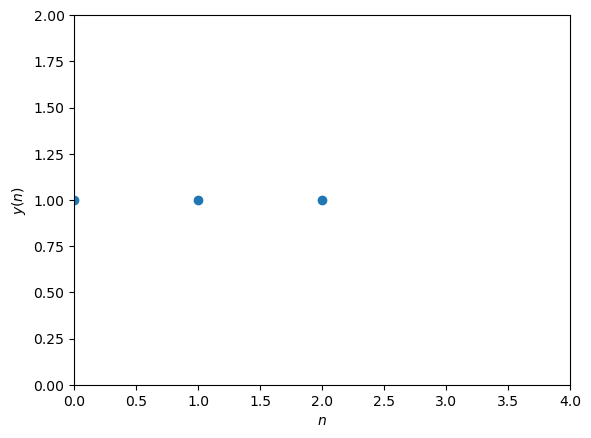

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 3)
y = np.ones(np.size(x))

fig, ax = plt.subplots()
ax.plot(x,y, ls="", marker="o")
ax.set_xlabel("$n$")
ax.set_ylabel("$y(n)$")
ax.set_xlim(0, 4)
ax.set_ylim(0, 2)
plt.show()

Calculate and plot unbiased and biased autocorrelation


#### Unbiased

$$
\begin{align*}
& \tilde{r}(0) = \frac{1}{3-0}\sum_{t=1}^{3}y(0)y^*(0) \\

& \tilde{r}(0) = \frac{1}{3}\sum_{t=1}^3(1)(1) = \frac{1}{3}(1 + 1 + 1) = 1 \\

& \tilde{r}(1) = \tilde{r}(-1)= \frac{1}{3-1}\sum_{t=2}^3y(1)y^*(1) \\

& \tilde{r}(1) = \tilde{r}(-1)= \frac{1}{2}\sum_{t=2}^3(1)(1) = \frac{1}{2}(1+1) = 1 \\

& \tilde{r}(2) = \tilde{r}(-2) = \frac{1}{3-2}\sum_{t=3}^{3}(1)(1) = \frac{1}{1}(1) = 1 \\
\end{align*}
$$


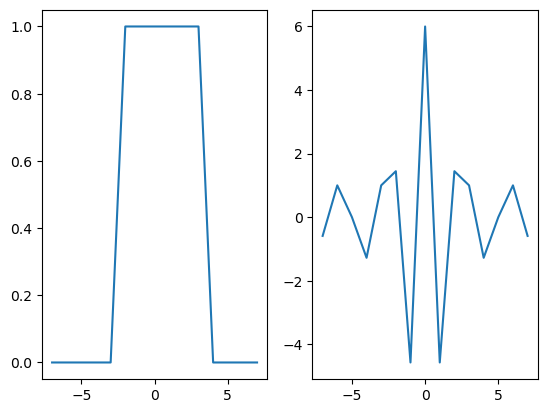

In [2]:
# Plot the Autocorrelation and the Transform

r = np.zeros(15)
r[5:11] = 1
x = np.arange(-7, 8)
phi = np.fft.fftshift(np.fft.fft(r))
freqs = np.arange(-7, 8)

fig, ax = plt.subplots(1, 2)
ax[0].plot(x,r)
ax[1].plot(freqs,phi.real+phi.imag)
plt.show()


Notice that the autocorrelation looks like a rectangle function and thus its Fourier Transform is a sinc function and thus in the unbiased case the Fourier Transform of the autocorrelation is not always non-negative.


#### Biased

$$
\begin{align*}
& \hat{r}(0) = \frac{1}{3}\sum_{t=1}^{3}(1)(1) = \frac{1}{3}(1+1+1) = 1 \\
& \hat{r}(1) = \hat{r}(-1) = \frac{1}{3}\sum_{t=2}^{3}(1)(1) = \frac{1}{3}(1+1) = \frac{2}{3} \\
& \hat{r}(2) = \hat{r}(-2) = \frac{1}{3}\sum_{t=3}^{3}(1)(1) = \frac{1}{3}(1) = \frac{1}{3}
\end{align*}
$$

Here we can see that the autocorrelation looks like a triangle function which has a Fourier Transform of a $\text{sinc}^2$ function which _is_ always non-negative as shown below


/opt/anaconda3/envs/book_env/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


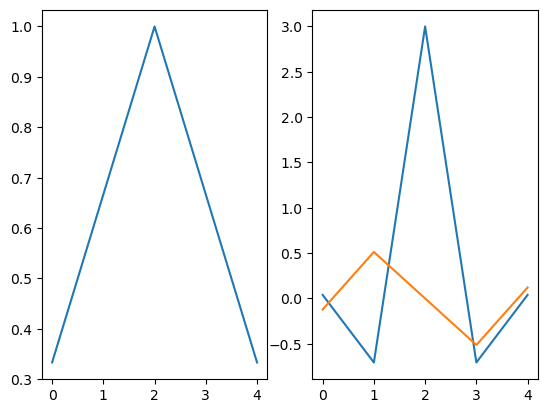

In [3]:
# TODO: Figure out why the FFT of r is not non-negative

# x = np.arange(-7, 8)
r = np.array([1/3, 2/3, 1, 2/3, 1/3])
phi = np.fft.fftshift(np.fft.fft(r))

fig, ax = plt.subplots(1,2)
ax[0].plot(r)
ax[1].plot(phi)
ax[1].plot(phi.imag)
ax[1].plot()
plt.show()

### Expectation of biased and unbiased autocorrelations

#### Unbiased

$$
\begin{align*}
E\{\tilde{r}(k)\} &= E\{\frac{1}{N-k}\sum_{i=k}^{N-1}x(i)x^*(i)\} \\
&= E\{x(i)x^*(i-k)\} = r(k) \\
&= \frac{1}{N-k}\sum_{i=k}^{N-1}r(k) = \frac{1}{N-k}(N-k)r(k) = r(k) \\
\therefore E\{\tilde{r}(k)\} &= r(k)
\end{align*}
$$

#### Biased

$$
\begin{align*}
E\{\hat{r}(k)\} &= E\{\frac{1}{N}\sum_{i=k}^{N-1}x(k)x^*(i-k)\} \\
&= \frac{1}{N}E\{\sum_{i=k}^{N-1}x(k)x^*(i-k)\} \\
&= \frac{1}{N}\sum_{i=k}^{N-1}r(k) = \frac{1}{N}(N-k)r(k) \\
\therefore E\{\hat{r}(k)\} &= \frac{N-k}{N}r(k)
\end{align*}
$$


Note that as $N\to\infty$ we have $E\{\hat{r}(k)\}\to r(k)$

This means that $\hat{r}(k)$ is asymptotically unbiased


## Relation between Periodogram $\hat{\phi}_p(\omega)$ and Correlogram $\hat{\phi}_c(\omega)$

### Periodogram compared to biased autocorrelation $\hat{r}(k)$

$$
\begin{align*}
\hat{\phi}_p(\omega) &= \frac{1}{N}|\sum_{t=1}^N y(t)e^{-i\omega t}|^2 \\
&= \sum_{k=-(N-1)}^{N-1}\hat{r}(k)e^{-i\omega k} = \hat{\phi}_c(\omega) \\
\end{align*}
$$

Therefore we have that the periodogram is the same as the correlogram using a biased estimator

$$
\therefore \hat{\phi}_p(\omega) = \hat{\phi}_c(\omega)\text{ with } \hat{r}(k)
$$


## Spectral Resolution

_Spectral_ means that we are in the frequency domain. The resolution is how fine of details can we make out in the frequency content. Can we tell the difference between $1Hz$ and $2Hz$ or $1Hz$ and $5Hz$

### Zero Padding

zero padding is adding zeros to the end of a dataset. This does not change the data but frequency points in the transform domain are closer together. However there is no new information added and thus _the spectral resolution is **not** improved_


## Properties of the Periodogram

$$
E\{\hat{\phi}_p(\omega)\} = E\{\hat{\phi}_c(\omega)\}
$$

and

$$
\hat{\phi}_p(\omega) \to \phi(\omega) \text{ as } N\to\infty
$$

For finite $N$ we want to estimate a scaler $a$ such that

1. bias $= E\{\hat{a}\}-a$ is as small as possible
2. the variance $=E\{(\hat{a}-E\{\hat{a}\})^2\}$
3. measurements are consistent
   - $\hat{a}\to a$ as $N\to\infty$

If these are not true then we need better measurements

### Bias of Periodogram

The bias of the periodogram is:

$$
\begin{align*}
E\{\hat{\phi_p}(\omega)\} = E\{\hat{\phi_c}(\omega)\} &= \sum_{k=-(N-1)}^{N-1}E\{\hat{r}(k)\}e^{-i\omega k} \\
&= \sum_{k=-(N-1)}^{N-1}[1-\frac{|k|}{N}]r(k)e^{-i\omega k}
\end{align*}
$$

Here we notice that $[1-\frac{|k|}{N}]$ is a window on the true autocorrelation $r(k)$ and we will rewrite this as $w_B(k)$ so the above equation then becomes

$$
\sum_{k=-(N-1)}^{N-1}w_Br(k)e^{-i\omega k}
$$

where

$$
w_B(k) = \begin{cases}
1-\frac{|k|}{N} & \text{if } |k|\geq N-1 \\
0 & \text{elsewhere}
\end{cases}
$$

### More Properties

$$
\begin{align*}
E\{\hat{\phi_P}(\omega)\} &= \phi(\omega) * W_B(\omega) \\
&= \frac{1}{2\pi}\int_{-\pi}^{\pi}\phi(\psi)W_B(\omega - \psi)d\psi
\end{align*}
$$

And so the PSD of the window is

$$
w_B(k) \supset W_B(\omega) = \frac{1}{N}[\frac{\sin(\frac{\omega N}{2})}{\sin(\frac{\omega}{2})}]^2
$$


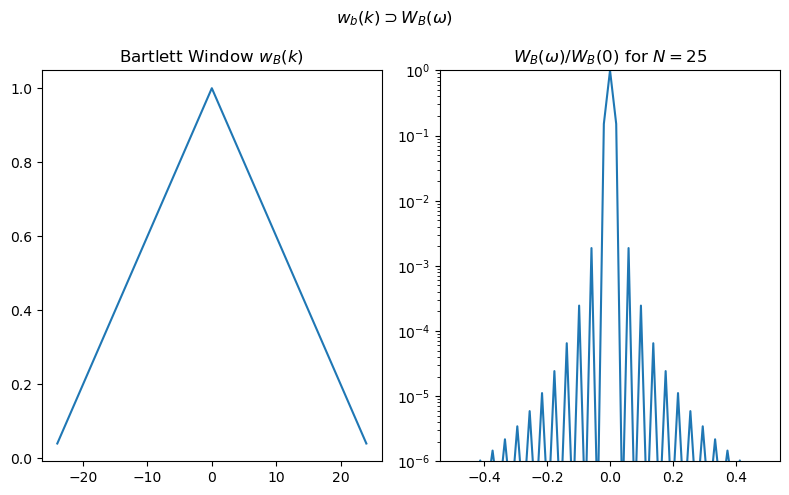

In [63]:
N = 25
k = np.linspace(-(N-1), N-1, 2*N+1)
bartlett_window = np.zeros(2*N+1)

for i in range(2*N+1):
    bartlett_window[i] = 1 - np.abs(k[i]) / N

psd = np.fft.fftshift(np.abs(np.fft.fft(bartlett_window))**2)
omega = np.fft.fftshift(np.fft.fftfreq(2*N+1))

fig, ax = plt.subplots(1, 2, figsize=(8,5))
ax[0].plot(k, bartlett_window)
ax[0].set_title("Bartlett Window $w_B(k)$")
ax[1].semilogy(omega, psd/psd.max())
ax[1].set_ylim(10e-7, 1)
ax[1].set_title("$W_B(\omega)/W_B(0)$ for $N=25$")
fig.suptitle("$w_b(k) \\supset W_B(\omega)$")
fig.tight_layout()
plt.show()


Ideally we want $W_B(\omega) = \delta(\omega)$ but that is not the case. Why not?

The main lobe width ($3dB$ width)

- The Bartlett Window causes smoothing or smearing of the transform

For example the $3dB$ widths of the Bartlett vs Rectangular windows

- Bartlett $\propto \frac{1}{N}$
- Rectangle $\propto \frac{3}{4}(\frac{1}{N})$

Side Lobe level

- leakage
- We want the first side lobe height to be as small as possible
- We want the side lobe roll off to be as fast as possible
  - The triangle window might be better for this
